<a href="https://colab.research.google.com/github/maxmaxine825/MSSP607/blob/main/Week_8_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
!git clone https://github.com/maxmaxine825/MSSP607.git
%cd MSSP607

Cloning into 'MSSP607'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 168 (delta 91), reused 36 (delta 18), pack-reused 0 (from 0)
Receiving objects: 100% (168/168), 5.99 MiB | 4.79 MiB/s, done.
Resolving deltas: 100% (91/91), done.
/content/MSSP607


In [3]:
df = pd.read_csv('data/InternetSales.csv', encoding='latin1')
print(f'Dataset loaded successfully!')

Dataset loaded successfully!


/tmp/ipython-input-3054880363.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/InternetSales.csv', encoding='latin1')


/tmp/ipython-input-2732013932.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(pd.Grouper(key="OrderDate", freq="M"))["SalesAmount"]
/tmp/ipython-input-2732013932.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


=== Forecasted Internet Sales for the Next Five Years ===
   Year  ForecastSales
0  2014    16152407.92
1  2015    21540030.89
2  2016    25629654.12
3  2017    29719277.34
4  2018    33808900.56
5  2019     3002009.43


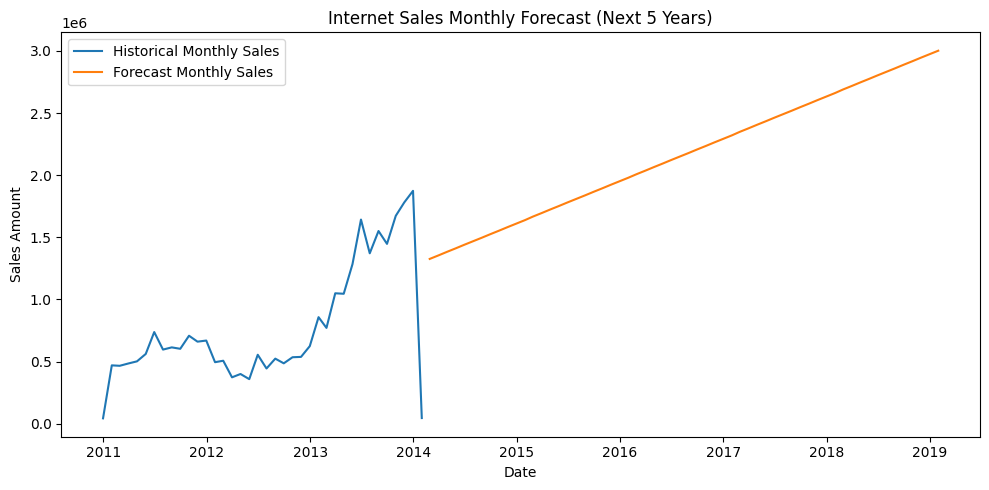

=== Predicted Top Product for Future Sales ===
Product: Mountain-200 Black, 46
Total Historical Sales: $1373469.55
Average per Order: $2215.27
Order Count: 620


In [5]:
df.columns = [c.strip() for c in df.columns]
df["OrderDate"] = pd.to_datetime(df["OrderDate"], errors="coerce")

monthly_sales = (
    df.groupby(pd.Grouper(key="OrderDate", freq="M"))["SalesAmount"]
    .sum()
    .reset_index()
    .sort_values("OrderDate")
)
monthly_sales["t"] = np.arange(len(monthly_sales))

X = monthly_sales[["t"]]
y = monthly_sales["SalesAmount"]
model = LinearRegression()
model.fit(X, y)

last_t = monthly_sales["t"].iloc[-1]
future_t = np.arange(last_t + 1, last_t + 61)
future_dates = pd.date_range(
    start=monthly_sales["OrderDate"].iloc[-1] + pd.offsets.MonthEnd(1),
    periods=60,
    freq="M"
)
future_preds = model.predict(future_t.reshape(-1, 1))

forecast_df = pd.DataFrame({
    "OrderDate": future_dates,
    "ForecastSales": future_preds
})
forecast_df["Year"] = forecast_df["OrderDate"].dt.year
yearly_forecast = forecast_df.groupby("Year")["ForecastSales"].sum().reset_index()
yearly_forecast["ForecastSales"] = yearly_forecast["ForecastSales"].round(2)
print("=== Forecasted Internet Sales for the Next Five Years ===")
print(yearly_forecast)

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales["OrderDate"], monthly_sales["SalesAmount"], label="Historical Monthly Sales")
plt.plot(forecast_df["OrderDate"], forecast_df["ForecastSales"], label="Forecast Monthly Sales")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.title("Internet Sales Monthly Forecast (Next 5 Years)")
plt.legend()
plt.tight_layout()
plt.savefig("internet_sales_forecast_monthly.png", dpi=300)
plt.show()

product_summary = df.groupby("EnglishProductName").agg(
    TotalSales=("SalesAmount", "sum"),
    Orders=("SalesAmount", "count"),
    AvgSales=("SalesAmount", "mean"),
    StdSales=("SalesAmount", "std")
).reset_index()
product_summary = product_summary.sort_values("TotalSales", ascending=False)
future_top_product = product_summary.iloc[0]
print("=== Predicted Top Product for Future Sales ===")
print(f"Product: {future_top_product['EnglishProductName']}")
print(f"Total Historical Sales: ${future_top_product['TotalSales']:.2f}")
print(f"Average per Order: ${future_top_product['AvgSales']:.2f}")
print(f"Order Count: {int(future_top_product['Orders'])}")
yearly_forecast.to_csv("internet_sales_yearly_forecast.csv", index=False)